# Task 5 - Sales Price Prediction

### Importing neccesary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 20)

### Load the Dataset

In [4]:
df = pd.read_csv("Advertising.csv")
print("Shape of the dataset: ",df.shape)
df.head(10)

Shape of the dataset:  (200, 5)


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


### Preprocessing and Analysing the Dataset

In [6]:
df.drop(df.columns[0], inplace=True, axis=1)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


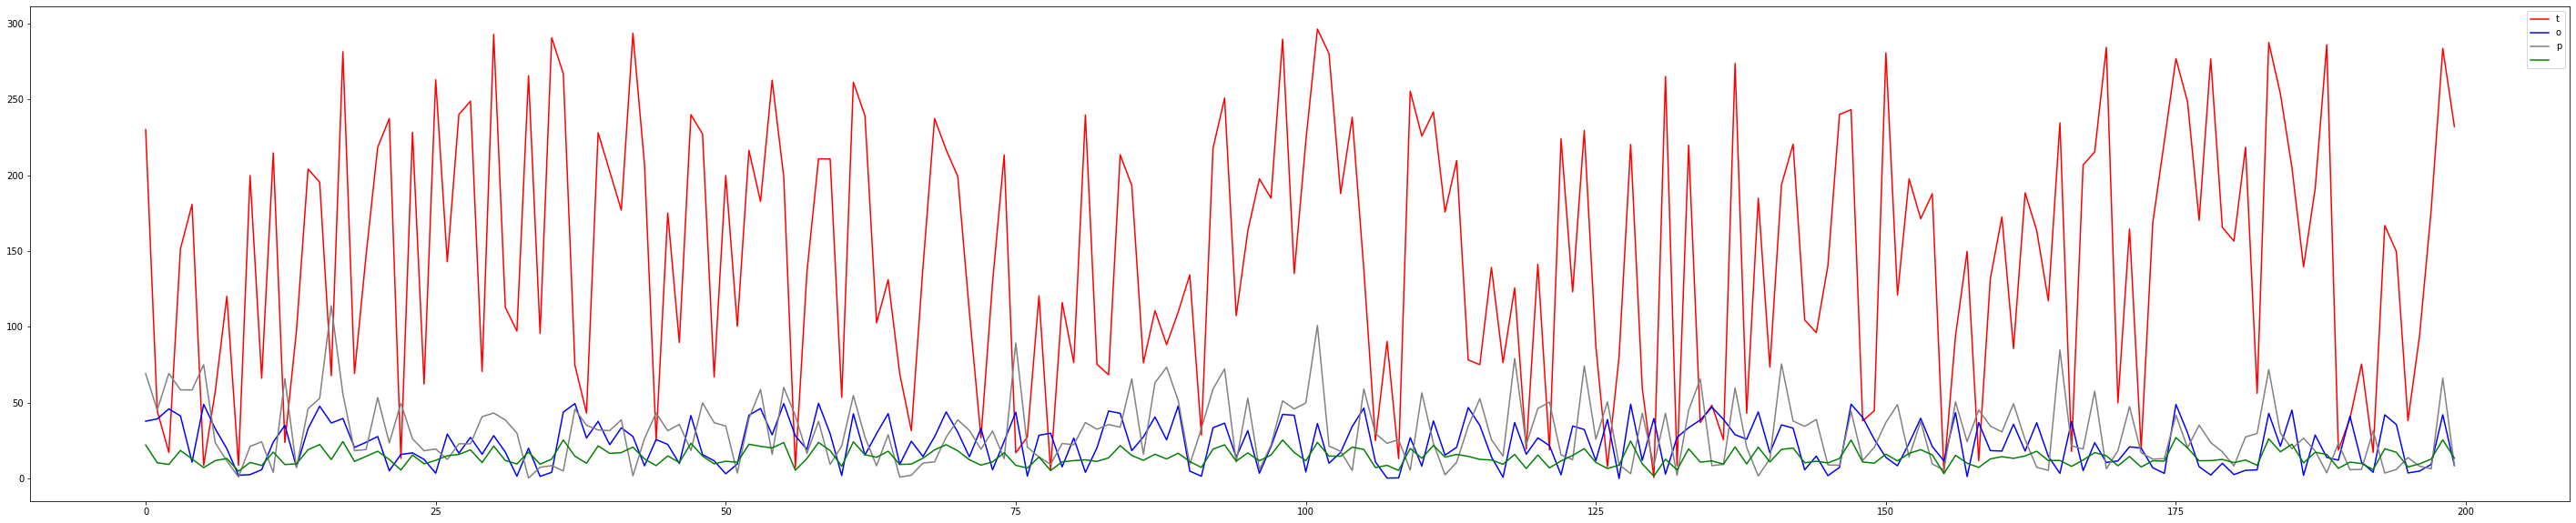

In [19]:
plt.figure(figsize=(50,10))
plt.plot(df['TV'], color='red', label='TV')
plt.plot(df['Radio'], color='blue', label='Radio')
plt.plot(df['Newspaper'], color='grey', label='Newspaper')
plt.plot(df['Sales'], color='green', label='Sales')
plt.legend('top right')
plt.show()

In [24]:
X = df.drop('Sales', axis=1)
y = df['Sales']

X.shape

(200, 3)

### Importing the necessary ML libraries

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

### Scaling and Spliting the data

In [41]:
mm = MinMaxScaler()
X = mm.fit_transform(X)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

### Model Building and Evaluating

In [43]:
clf = DecisionTreeRegressor()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

In [44]:
mean_squared_error(y_test, pred)

1.3906000000000003

In [45]:
clf1 = LinearRegression()
clf1.fit(X_train, y_train)
pred1 = clf1.predict(X_test)

In [46]:
mean_squared_error(y_test, pred1)

2.845057770937063

*Hence `Decision Tree Regressor` works best for this problem*